# **Preparación de datos - Modelamiento - Despliegue**


*   Susana Gutiérrez García
*   Simón Botero Arango
*   David López Cuervo



**2.** **PREPARACION DE DATOS**

2.1 INTEGRACIÓN

2.2 SELECCIÓN DE VARIABLES

2.3 DESCRIPCIÓN ESTADÍSTICA

2.4 LIMPIEZA DE ATÍPICOS

2.5 LIMPIEZA DE NULOS

2.6 CREACIÓN DE NUEVAS VARIABLES

2.7 ANÁLISIS DE CORRELACIONES PARA REDUNDANCIA

2.8 BALANCEO (CLASIFICACIÓN)

2.9 SEPARACION DE DATOS

**3.** **MODELOS PREDICTIVOS**

3.1 CONFIGURACIÓN MÉTODOS DE APRENDIZAJE SUPERVISADOS

3.2 CONFIGURACIÓN MÉTODOS DE ENSAMBLE

3.3 ANALISIS DE MEDIDAS DE CALIDAD

3.4 HIPERPARAMETRIZACIÓN

3.5 SELECCIÓN DEL MEJOR MODELO

**4.DESPLIEGUE**

4.1 PREDICCIÓN DE DATOS FUTUROS

4.2 CRONOGRAMA DE RE-ENTRENAMIENTO DEL MODELO

# **2. Preparación de datos**

## *2.1 Integración de datos*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("bike_buyers.csv")
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


## *2.2 Selección de variables*

In [ ]:
data = data.drop('ID',axis=1)

## *2.3 Descripción estadística*

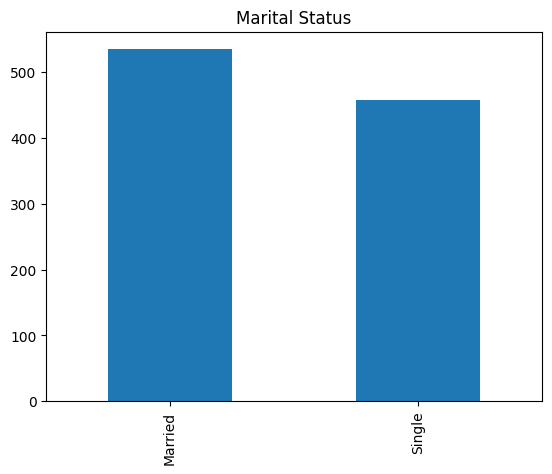

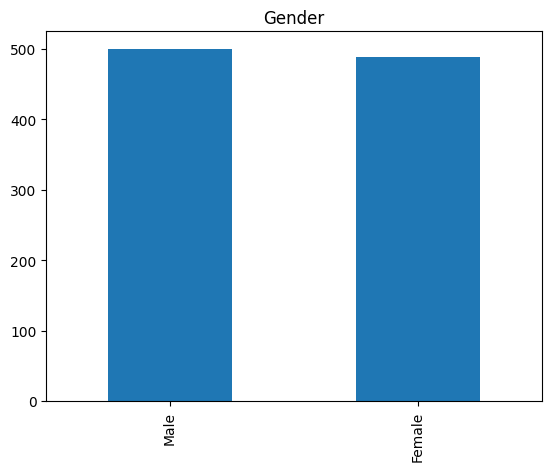

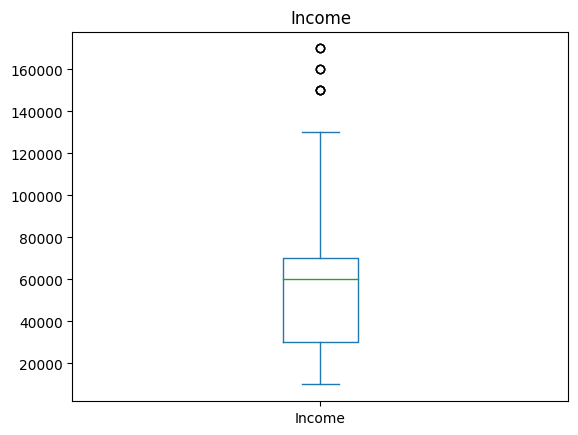

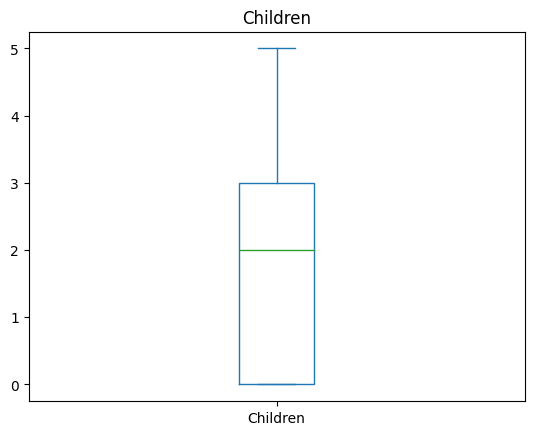

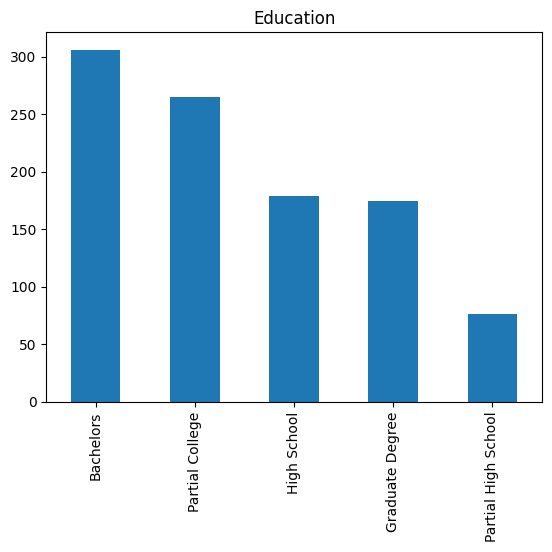

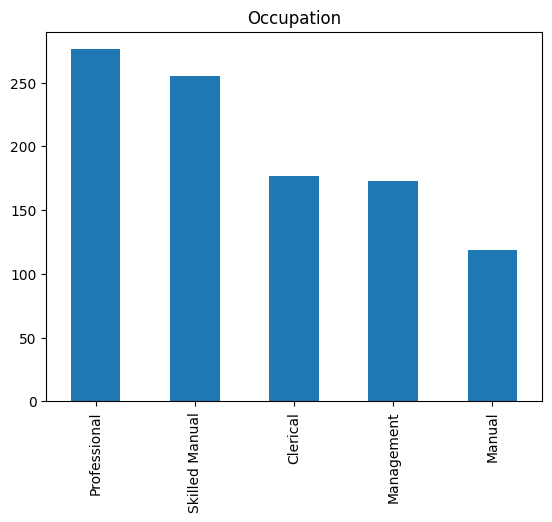

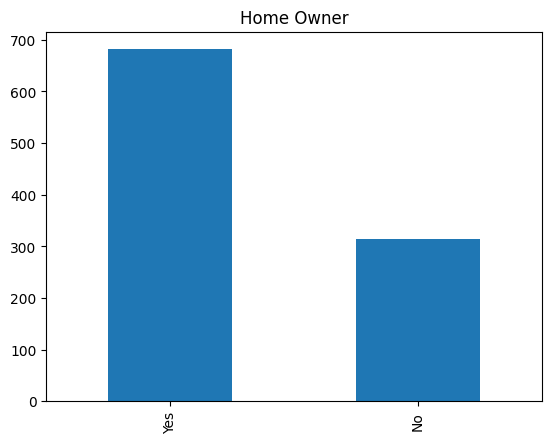

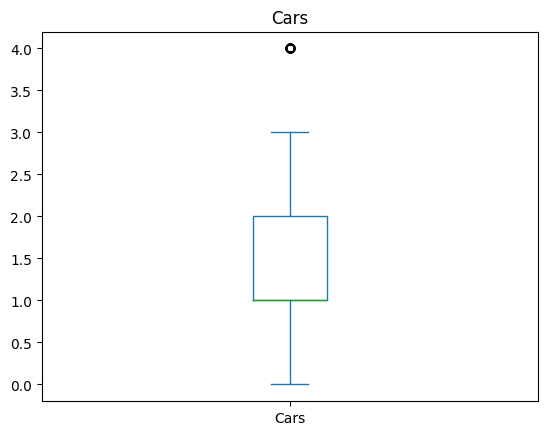

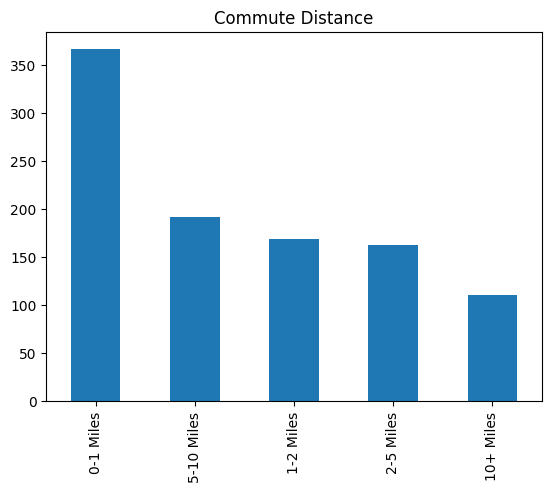

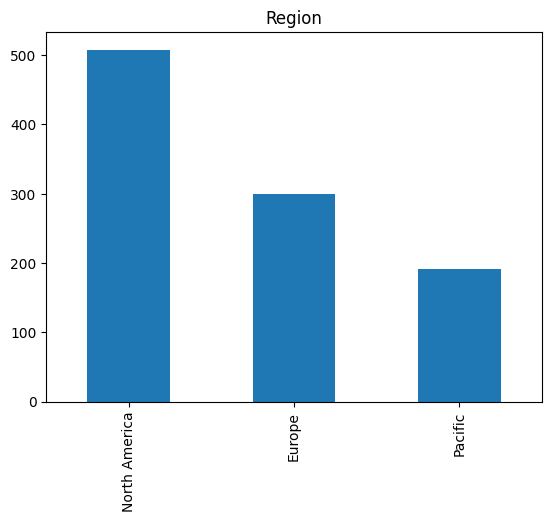

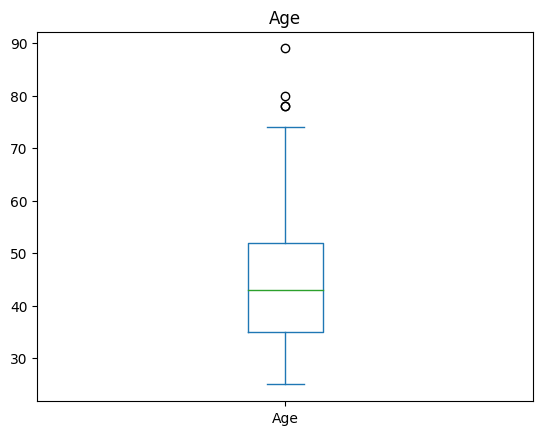

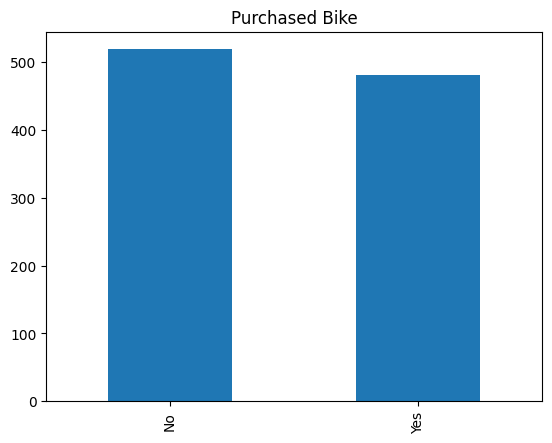

In [ ]:
for column in data.columns:
  if data[column].dtype== "object" :
    data[column] = data[column].astype('category')
    data[column].value_counts().plot(kind = 'bar')
  else:
    data[column].plot(kind = 'box')
  plt.title(column)
  plt.show()



**Pandas profiling**

In [ ]:
!pip uninstall pandas-profiling -y -q
!pip install pandas-profiling[notebook] -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.9 MB/s eta 0:00:00


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(data)

<ipython-input-8-63c01991bc47>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## *2.4 Limpieza de atípicos*

Nuestro conjunto de datos no contaba con datos atipicos

## *2.5 Limpieza de nulos*

In [ ]:
data.isna().sum()

Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
ImpNumeros = SimpleImputer(missing_values=np.nan,strategy='mean')
data[['Income','Children','Cars','Age']] = ImpNumeros.fit_transform(data[['Income','Children','Cars','Age']])

ImpCategorias = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
data[['Marital Status','Gender','Home Owner']] = ImpCategorias.fit_transform(data[['Marital Status','Gender','Home Owner']])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Marital Status    1000 non-null   object  
 1   Gender            1000 non-null   object  
 2   Income            1000 non-null   float64 
 3   Children          1000 non-null   float64 
 4   Education         1000 non-null   category
 5   Occupation        1000 non-null   category
 6   Home Owner        1000 non-null   object  
 7   Cars              1000 non-null   float64 
 8   Commute Distance  1000 non-null   category
 9   Region            1000 non-null   category
 10  Age               1000 non-null   float64 
 11  Purchased Bike    1000 non-null   category
dtypes: category(5), float64(4), object(3)
memory usage: 60.6+ KB


In [ ]:
print(ImpNumeros.statistics_)
print(ImpCategorias.statistics_)


[5.62676056e+04 1.91028226e+00 1.45509586e+00 4.41814516e+01]
['Married' 'Male' 'Yes']


In [ ]:
data['Cars'] = round(data['Cars'])
data['Age'] = round(data['Age'])

## *2.6 Creación de nuevas variables (dummies)*

In [ ]:
data = pd.get_dummies(data,columns=['Education','Occupation','Commute Distance','Region'],drop_first=False) 
data = pd.get_dummies(data,columns=['Marital Status','Gender','Home Owner'],drop_first=True)
data.head()

,Income,Children,Cars,Age,Purchased Bike,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,...,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific,Marital Status_Single,Gender_Male,Home Owner_Yes
0,40000.0,1.0,0.0,42.0,No,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,30000.0,3.0,1.0,43.0,No,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2,80000.0,5.0,2.0,60.0,No,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,70000.0,0.0,1.0,41.0,Yes,1,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1
4,30000.0,0.0,0.0,36.0,Yes,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Purchased Bike'] = labelencoder.fit_transform(data['Purchased Bike'])

## *2.7 Análisis de correlaciones para redundancia*

<Axes: >

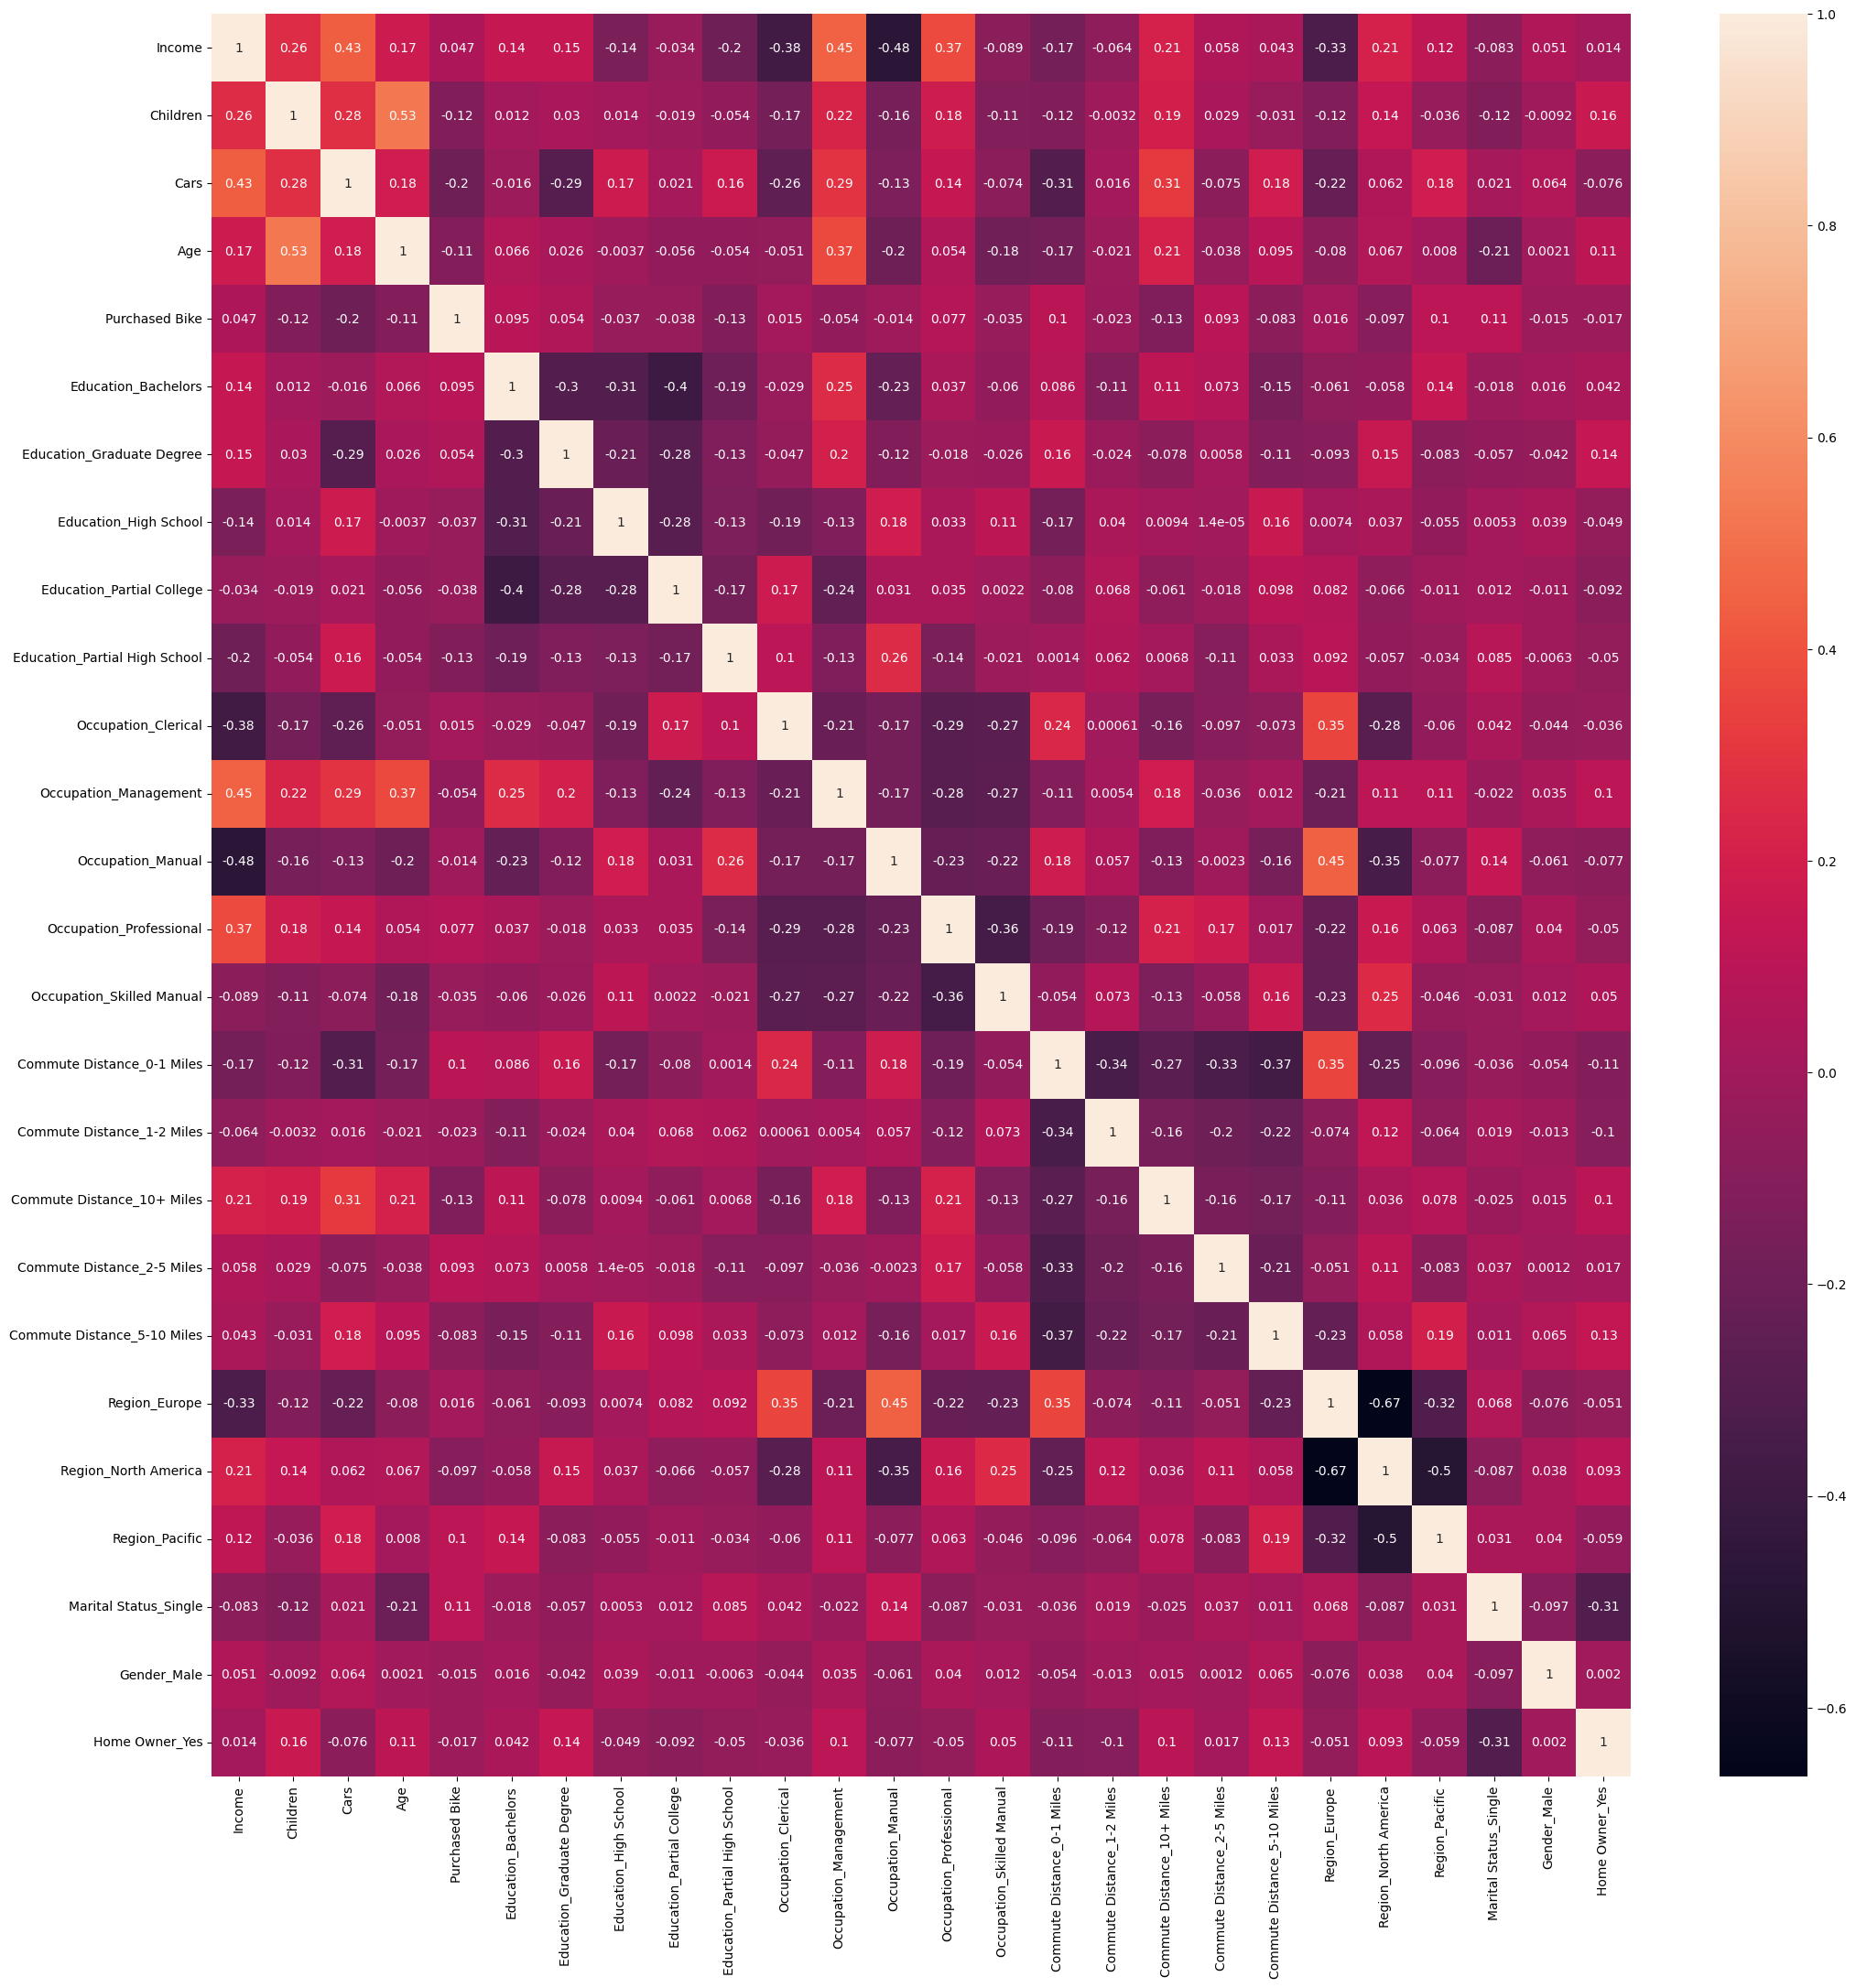

In [ ]:
import seaborn as sns
plt.figure(figsize = (25,25))
sns.heatmap(data.corr(),annot=True)


## *2.8 Balanceo:* No es necesario realizar balanceo

## *2.9 Separación de variables para Cross Validation*

In [ ]:
#Se separa variables predictoras y objetivo
X = data.drop("Purchased Bike", axis = 1)
Y = data['Purchased Bike']

# **3. Creación de los modelos predictivos avanzados**

## *3.1 Métodos de aprendizaje supervisado de maquinas*

Creamos un dataframe 'medidas' para guardar las medidas de evaluacion para cada modelo

In [ ]:
medidas = pd.DataFrame(index=['fit_time', 'score_time', 'test_roc_auc', 'test_accuracy',
       'test_precision', 'test_recall'])

Base learners

### *Arbol de decisión*

In [ ]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 2, max_depth = 10)
#Validación Cruzada: division, aprendizaje, evaluacion
from sklearn.model_selection import cross_validate
scores = cross_validate(model_tree, X, Y, cv=10, scoring=('roc_auc', 'accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores.mean()

fit_time          0.006867
score_time        0.010284
test_roc_auc      0.691749
test_accuracy     0.660000
test_precision    0.653667
test_recall       0.623724
dtype: float64

In [ ]:
from sklearn.tree import plot_tree
model_tree.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)

In [ ]:
#Agregamos las medidas de evaluacion del arbol al dataframe
medidas['arbol'] = scores.mean()

### *knn*

In [ ]:
#Normalizacion las variables numéricas (las dummies no se normalizan)
from sklearn.preprocessing import MinMaxScaler
 
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data[['Income','Children','Cars','Age']]) #Ajuste de los parametros: max - min
data[['Income','Children','Cars','Age']]= min_max_scaler.transform(data[['Income','Children','Cars','Age']]) 

In [ ]:
#Método Knn
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
model_knn.fit(X, Y) 
 
#Evaluación
scores = cross_validate(model_knn, X, Y, cv=10, scoring=('roc_auc', 'accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

#Agregamos las medidas de evaluacion del Knn al dataframe
medidas['knn'] = scores.mean()

### *Regresión logística*

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X,Y)
scores = cross_validate(model_logistic, X, Y, cv=10, scoring=('roc_auc', 'accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
#Agregamos las medidas de evaluacion de la regresion logistica al dataframe
medidas['regresión logística'] = scores.mean()

### *Redes neuronales*

In [ ]:
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(activation="identity",hidden_layer_sizes=(14), learning_rate='adaptive',
                     learning_rate_init=0.05, momentum= 0.3, max_iter=1500, verbose=False,solver = 'lbfgs',
                     random_state=1)
model_rn.fit(X, Y)
scores = cross_validate(model_rn, X, Y, cv=10, scoring=('roc_auc', 'accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

#Agregamos las medidas de evaluacion de la red neuronal al dataframe
medidas['red neuronal'] = scores.mean()

#Observamos todas las medidas obtenidas para todos los modelos creados
medidas.head()

,arbol,knn,regresión logística,red neuronal
fit_time,0.006867,0.002956,0.015815,0.482088
score_time,0.010284,0.019279,0.012956,0.019308
test_roc_auc,0.691749,0.730857,0.584303,0.630653
test_accuracy,0.660000,0.661000,0.549000,0.593000
test_precision,0.653667,0.741332,0.533313,0.578680


## *3.2 Métodos de ensambles*




### *Random forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier# en regresión sería Regresor
model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='entropy',
                              max_depth=None, min_samples_leaf=2)
scores = cross_validate(model_rf, X, Y, cv=10, scoring=('roc_auc', 'accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
medidas['random forest'] = scores.mean()


### *XGBoost*

In [ ]:
from sklearn.ensemble import AdaBoostClassifier# en regresión sería Regresor
modelo_base= model_tree
model_boos = AdaBoostClassifier(modelo_base, n_estimators=30)#50 subconjuntos
scores = cross_validate(model_boos, X, Y, cv=10, scoring=('roc_auc', 'accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
medidas['xgboost'] = scores.mean()

### *Stacking*

In [ ]:
from sklearn.ensemble import StackingClassifier
 
clasificadores= [('arbol', model_tree), ('knn', model_knn), ('reg', model_logistic),('rn',model_rn)]
 
metodo_ensamblador= LogisticRegression() #SVM, NN, KNN
 
model_stack= StackingClassifier(estimators=clasificadores, final_estimator=metodo_ensamblador)
scores = cross_validate(model_stack, X, Y, cv=10, scoring=('roc_auc', 'accuracy','precision', 'recall'), return_train_score=False, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
medidas['stacking'] = scores.mean()

medidas.head()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase th

,arbol,knn,regresión logística,red neuronal,random forest,xgboost,stacking
fit_time,0.006867,0.002956,0.015815,0.482088,0.277303,0.148144,1.445136
score_time,0.010284,0.019279,0.012956,0.019308,0.044723,0.020054,0.063930
test_roc_auc,0.691749,0.730857,0.584303,0.630653,0.789845,0.739795,0.764850
test_accuracy,0.660000,0.661000,0.549000,0.593000,0.720000,0.680000,0.711000
test_precision,0.653667,0.741332,0.533313,0.578680,0.722852,0.670572,0.707528


## *3.3 Análisis e interpretación de las medidas de calidad*

In [ ]:
medidas

,arbol,knn,regresión logística,red neuronal,random forest,xgboost,stacking
fit_time,0.006867,0.002956,0.015815,0.482088,0.277303,0.148144,1.445136
score_time,0.010284,0.019279,0.012956,0.019308,0.044723,0.020054,0.063930
test_roc_auc,0.691749,0.730857,0.584303,0.630653,0.789845,0.739795,0.764850
test_accuracy,0.660000,0.661000,0.549000,0.593000,0.720000,0.680000,0.711000
test_precision,0.653667,0.741332,0.533313,0.578680,0.722852,0.670572,0.707528
test_recall,0.623724,0.465816,0.336777,0.571769,0.688265,0.667389,0.698597


* **test_roc_auc:** Es el area bajo la curva que hay si en un plano graficamos en el eje x la tasa de falsos positivos(los que el modelo predijo que compraban bicicleta pero no lo hicieron) y en el eje y la tasa de verdaderos positivos(los que el modelo predijo que compraban y si lo hicieron). La medida más cercana a 1 es la mejor

* **test_accuracy:** De todas las predicciones acerca de que no compraban o compraban, cuantas fueron acertadas

* **test_precision:** De todas las veces que el modelo predijo que si compraban bicicleta, cuantas fueron acertadas

* **test_recall:** de todos los que compraron bicicletas, cuantos el modelo predijo bien



## *3.4 Hiperparametrización*

### *Knn*



In [ ]:
#KNN
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.model_selection  import GridSearchCV
modelKnn = KNeighborsClassifier()
 
# Definir los hiperparametros
n_neighbors=list(range(1,15,1))
metric=['euclidean','minkowski']
 
#Grid
param_grid = dict(n_neighbors=n_neighbors, metric=metric)
grid = GridSearchCV(estimator=modelKnn, param_grid=param_grid, scoring='roc_auc', n_jobs=-1,cv=10)
grid.fit(X, Y)
 
#Mejor modelo
modelKnn= grid.best_estimator_
print(grid.best_score_)
print( grid.best_params_)
 

0.7299755719595532
{'metric': 'euclidean', 'n_neighbors': 2}


### *Random forest*

In [ ]:
#random forest
model_rf= RandomForestClassifier(n_estimators=100,  max_samples=0.7, criterion='gini',
                              max_depth=None, min_samples_leaf=2)

# Definir los hiperparametros
n_estimators = [50,100,150]
criterion = ['entropy']
max_samples = [0.7]
max_depth = [5,10,17]
min_samples_leaf = [2,5,10]

 
#Grid
param_grid = dict(max_samples= max_samples,n_estimators=n_estimators, criterion=criterion,max_depth = max_depth,min_samples_leaf = min_samples_leaf)
grid = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='roc_auc', n_jobs=-1,cv=10)#10 crossvalidation
grid.fit(X, Y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_samples=0.7,
                                              min_samples_leaf=2),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 17],
                         'max_samples': [0.7], 'min_samples_leaf': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [ ]:
model_rf = grid.best_estimator_
print(grid.best_score_)
print( grid.best_params_)
# Mejores párametros
print( grid.best_params_)

0.7914484543817527
{'criterion': 'entropy', 'max_depth': 17, 'max_samples': 0.7, 'min_samples_leaf': 2, 'n_estimators': 150}
{'criterion': 'entropy', 'max_depth': 17, 'max_samples': 0.7, 'min_samples_leaf': 2, 'n_estimators': 150}


In [ ]:
model_rf.predict(X)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

### *Stacking*

In [ ]:
#Stacking
from sklearn.tree import DecisionTreeClassifier

# Definir los hiperparametros
final_estimator = [LogisticRegression(),KNeighborsClassifier(n_neighbors=2, metric='euclidean'),DecisionTreeClassifier(criterion='gini', min_samples_leaf=20, max_depth=4)]

#Grid
param_grid = dict(final_estimator=final_estimator)
grid = GridSearchCV(estimator=model_stack, param_grid=param_grid, scoring='roc_auc', n_jobs=-1, cv=10)
grid.fit(X,Y)
#Mejor modelo
model_stack= grid.best_estimator_
 
#Medida de evaluación del mejor modelo
print(grid.best_score_)
 
# Mejores párametros
print( grid.best_params_)
 


0.757800524055776
{'final_estimator': LogisticRegression()}


In [ ]:
data.head()

,Income,Children,Cars,Age,Purchased Bike,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,...,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_Europe,Region_North America,Region_Pacific,Marital Status_Single,Gender_Male,Home Owner_Yes
0,0.1875,0.2,0.00,0.265625,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.1250,0.6,0.25,0.281250,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2,0.4375,1.0,0.50,0.546875,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,0.3750,0.0,0.25,0.250000,1,1,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1
4,0.1250,0.0,0.00,0.171875,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


### *Guardar el modelo*

In [ ]:
import pickle
pickle.dump([model_rf, X.columns._values,labelencoder,min_max_scaler],open('modeloBicicletas.pkl','wb'))

# **4. Despliegue**

el despliegue se hará con el modelo de random forest porque este tiene mayor curva roc. Lo que queremos es que el modelo, de todos los que compran, prediga una alta cantidad bien y que de los que no compraron, el modelo prediga que compran en muy pocos casos.